In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('testdata.manual.2009.06.14.csv', header = None, names=['polarity','id','date','query','username','text'])
data.head(20)

,polarity,id,date,query,username,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  516 non-null    int64 
 1   id        516 non-null    int64 
 2   date      516 non-null    object
 3   query     516 non-null    object
 4   username  516 non-null    object
 5   text      516 non-null    object
dtypes: int64(2), object(4)
memory usage: 24.3+ KB


In [6]:
data.isnull().sum()

polarity    0
id          0
date        0
query       0
username    0
text        0
dtype: int64

In [7]:
data.describe()

,polarity,id
count,516.000000,516.000000
mean,2.077519,2293.281008
std,1.707152,3575.973001
min,0.000000,3.000000
25%,0.000000,392.750000
50%,2.000000,1022.500000
75%,4.000000,2380.250000
max,4.000000,14087.000000


In [8]:
text_content = data['text']
text_content.head()

0    @stellargirl I loooooooovvvvvveee my Kindle2. ...
1    Reading my kindle2...  Love it... Lee childs i...
2    Ok, first assesment of the #kindle2 ...it fuck...
3    @kenburbary You'll love your Kindle2. I've had...
4    @mikefish  Fair enough. But i have the Kindle2...
Name: text, dtype: object

In [9]:
sentiment_labels = data['polarity']
sentiment_labels.head()

0    4
1    4
2    4
3    4
4    4
Name: polarity, dtype: int64

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [11]:
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to C:\Users\Anjali
[nltk_data]     Bhamare\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anjali
[nltk_data]     Bhamare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anjali
[nltk_data]     Bhamare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anjali
[nltk_data]     Bhamare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [13]:
data['preprocessed_text'] = data['text'].apply(preprocess_text)
data[['text','preprocessed_text']].head()

,text,preprocessed_text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,stellargirl loooooooovvvvvveee kindle dx cool ...
1,Reading my kindle2... Love it... Lee childs i...,reading kindle love lee child good read
2,"Ok, first assesment of the #kindle2 ...it fuck...",ok first assesment kindle fucking rock
3,@kenburbary You'll love your Kindle2. I've had...,kenburbary youll love kindle ive mine month ne...
4,@mikefish Fair enough. But i have the Kindle2...,mikefish fair enough kindle think perfect


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sentiment_counts = data['polarity'].value_counts()
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

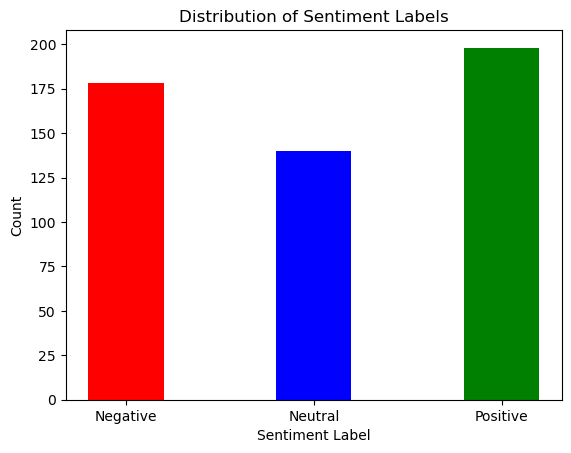

In [16]:
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(sentiment_counts.index, ['Positive', 'Negative', 'Neutral'])
plt.show()

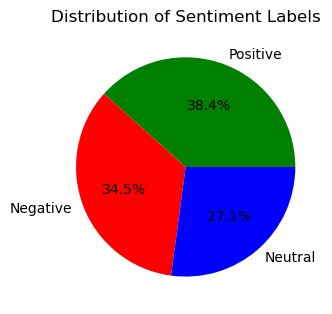

In [17]:
plt.subplot(1, 2, 2)
plt.pie(sentiment_counts, labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Distribution of Sentiment Labels')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])
print("Feature Names:")
print(tfidf_vectorizer.get_feature_names_out())
tfidf_matrix_array = tfidf_matrix.toarray()
print("\nShape of TF-IDF Matrix:")
print(tfidf_matrix_array.shape)

Feature Names:
['00' '000' '04fo' ... 'zomg' 'zoom' 'zydrunas']

Shape of TF-IDF Matrix:
(516, 2264)


In [20]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
data['text'] = data['text'].apply(lambda x: x.lower())

# Remove special characters and digits
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'\d+', '', x))

# Tokenization
data['text'] = data['text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [23]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))
y = data['polarity']

In [24]:
label_encoder = LabelEncoder()
y_lstm = label_encoder.fit_transform(y)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_tfidf.toarray(), y_lstm, test_size=0.2, random_state=42)

In [26]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [27]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)


In [28]:
vocab_size = len(tfidf_vectorizer.vocabulary_)
max_len = X_tfidf.shape[1]

In [29]:
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32)
lstm_pred_probabilities = lstm_model.predict(X_test_lstm)
lstm_pred_classes = (lstm_pred_probabilities > 0.5).astype("int32")

NameError: name 'lstm_model' is not defined

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, nb_pred)
print("Naive Bayes Performance:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

In [ ]:
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(y_test, svm_pred)
print("\nSupport Vector Machine Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [ ]:
svm_model = SVC()

In [ ]:
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

In [ ]:
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_
print("Best Parameters for SVM:", best_params_svm)
print("Best Accuracy Score for SVM:", best_score_svm)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(C=1, gamma=0.1, kernel='rbf')

In [ ]:
cv_scores = cross_val_score(svm_model, X_tfidf, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

In [36]:
from sklearn.inspection import permutation_importance
svm_model.fit(X_train, y_train)
X_test_dense = X_test.toarray()
feature_names = tfidf_vectorizer.get_feature_names_out()
perm_importance = permutation_importance(svm_model, X_test_dense, y_test, n_repeats=10, random_state=42)
importance_scores = perm_importance.importances_mean
sorted_indices = np.argsort(importance_scores)[::-1]
print("Top 10 Features Contributing to Sentiment Prediction:")
for i in sorted_indices[:10]:
    print(feature_names[i], importance_scores[i])

Top 10 Features Contributing to Sentiment Prediction:
eating 0.025961538461538425
gm 0.024038461538461498
love 0.02307692307692305
kindle 0.017307692307692267
good 0.015384615384615353
went 0.013461538461538424
night 0.011538461538461497
happy 0.01057692307692304
hour 0.01057692307692304
cool 0.01057692307692304


In [45]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

In [50]:
y_pred = svm_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.6923076923076923
Confusion Matrix:
[[19  1  7]
 [ 6  9 15]
 [ 3  0 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        27
           2       0.90      0.30      0.45        30
           4       0.67      0.94      0.78        47

    accuracy                           0.69       104
   macro avg       0.75      0.65      0.64       104
weighted avg       0.74      0.69      0.66       104

